In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 선형 회귀 가설 함수

In [2]:
def prediction(theta_0, theta_1, x):
    # 주어진 벡터 x에 대해서 예측 값을 리턴하는 함수
    return theta_0 + theta_1 * x

In [3]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
theta_0 = -3
theta_1 = 2

In [4]:
prediction(theta_0, theta_1, house_size)

array([-1.2, -0.2,  1. ,  1.2,  2.2,  3.6,  3.7,  4.8,  5.8,  6.4,  7.4,
        8.5, 10.4, 10.8])

### 선형 회귀 오차 함수

In [5]:
def prediction_difference(theta_0, theta_1, x, y):
    # 모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수"
    return prediction(theta_0, theta_1, x) - y

In [6]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

theta_0 = -3
theta_1 = 2

In [7]:
prediction_difference(-3, 2, house_size, house_price)

array([-1.5 , -0.95,  0.55,  0.1 ,  0.75,  2.7 ,  1.9 ,  3.9 ,  4.3 ,
        4.2 ,  5.65,  6.2 ,  7.91,  8.2 ])

### 선형 회귀 경사 하강법 구현

In [8]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산

        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
        
    return theta_0, theta_1

In [9]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1 = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

In [10]:
theta_0, theta_1

(0.16821801417752186, 0.3438032402351199)

### 경사 하강법 시각화

In [11]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    # 주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수
    m = len(x)
    cost_list = [] # 경사 하강을 할 때 마다 그 시점에서의 손실을 저장
    # 손실 계산
    # 각각의 오차를 제곱한 뒤 모두 더하고 2m으로 나눈다.
    # error : 모든 오차가 담겨있는 벡터

    
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = error @ error / (2*m)
        cost_list.append(cost)
        
        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
        
    return theta_0, theta_1, cost_list

In [13]:
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

In [14]:
theta_0, theta_1

(0.10843339884797569, 0.3566912224719406)

### 경사 하강을 반복할 수록, 손실이 감소하는 것을 확인

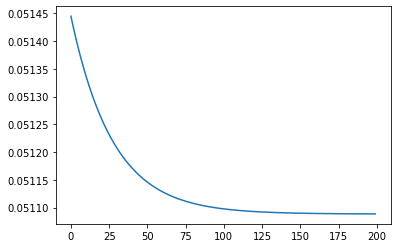

In [16]:
plt.plot(cost_list)

### 산점도

In [25]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    # 주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수
    m = len(x)
    cost_list = [] # 경사 하강을 할 때 마다 그 시점에서의 손실을 저장
    # 손실 계산
    # 각각의 오차를 제곱한 뒤 모두 더하고 2m으로 나눈다.
    # error : 모든 오차가 담겨있는 벡터

    
    for i in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = error @ error / (2*m)
        cost_list.append(cost)
        
        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
        
        # 경사 하강 40번 실행마다 그래프 출력
        if i % 40 == 0 :
            # x 축 집 크기, y 축 집 가격
            plt.scatter(house_size, house_price)
            # 가설 함수 포함하여 그리기
            # x 축 집 크기, y 축 예측 가격
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='green')
            plt.show()
        
    return theta_0, theta_1, cost_list

In [26]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

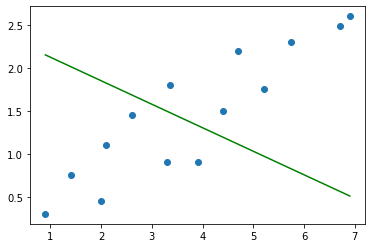

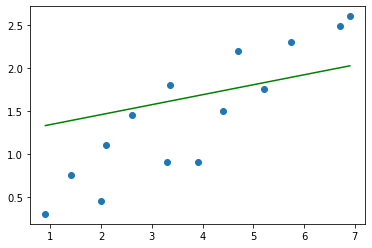

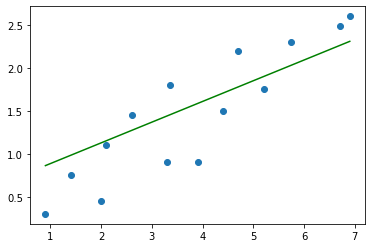

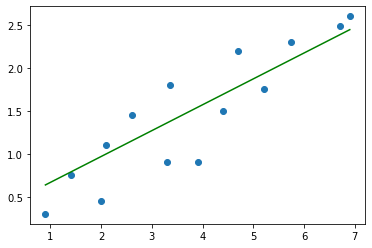

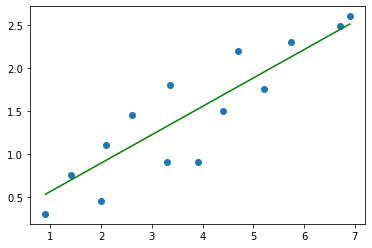

(0.16821801417752186,
 0.3438032402351199,
 [0.8028607142857141,
  0.72653635498043,
  0.6655735232469805,
  0.6161934087610514,
  0.57557803641605,
  0.5416247903943346,
  0.5127636948604566,
  0.4878214058610251,
  0.46591997151102793,
  0.44640147111287576,
  0.42877191668299114,
  0.41265949207106833,
  0.3977834640299437,
  0.38393103682084184,
  0.37094011953497313,
  0.35868649454700224,
  0.34707426199240643,
  0.3360287228228698,
  0.3254910771065514,
  0.3154144736084679,
  0.30576106530741815,
  0.29649981379811263,
  0.2876048512449703,
  0.2790542574692638,
  0.2708291461600097,
  0.26291298129888746,
  0.255291065060604,
  0.24795015346405005,
  0.24087816722490646,
  0.23406397357851133,
  0.2274972210333042,
  0.2211682136237674,
  0.21506781466218325,
  0.20918737254197986,
  0.20351866304614177,
  0.198053844029018,
  0.19278541939308028,
  0.1877062100662331,
  0.18280933026896373,
  0.17808816779518172,
  0.17353636735414588,
  0.16914781626180092,
  0.1649166319492

In [27]:
gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)